## Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from haversine import haversine, Unit
import seaborn as sns
import geopandas
from shapely.geometry import Point
import geoplot
import matplotlib.pyplot as plt

## Importing The Dataset

In [4]:
df = pd.DataFrame(pd.read_csv('merged_df2.csv'))

C:\Users\SaraM\AppData\Local\Temp\ipykernel_43744\4150167128.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.DataFrame(pd.read_csv('merged_df2.csv'))


In [5]:
amenities= ['24 Hour Availability', 'Air Conditioning', 'Attic', 'Balcony', 'Basement', 'Basketball Court', 'Bay Window', 'Bike Storage',
'Breakfast Nook', 'Breakfast/Coffee Concierge', 'Built-In Bookshelves', 'Business Center', 'Cabana', 'Cable Ready', 'Car Charging Station', 'Carpet',
'Ceiling Fans', 'Clubhouse', 'Coffee System', 'Community-Wide WiFi', 'Concierge', 'Conference Room', 'Controlled Access', 'Corporate Suites',
'Courtyard', 'Crown Molding', 'Day Care', 'Deck', 'Den', 'Dining Room', 'Dishwasher', 'Disposal',
'Disposal Chutes', 'Dock', 'Doorman', 'Double Pane Windows', 'Double Vanities', 'Dry Cleaning Service', 'Eat-in Kitchen', 'Elevator',
'Family Room', 'Fenced Lot', 'Fireplace', 'Fitness Center', 'Framed Mirrors', 'Freezer', 'Furnished', 'Furnished Units Available',
'Gameroom', 'Garden', 'Gated', 'Granite Countertops', 'Greenhouse', 'Grill', 'Grocery Service', 'Guest Apartment',
'Handrails', 'Hardwood Floors', 'Health Club Discount', 'Hearing Impaired Accessible', 'Heating', 'High Speed Internet Access', 'House Sitter Services', 'Ice Maker',
'In Unit Washer & Dryer', 'Individual Leases Available', 'Individual Locking Bedrooms', 'Instant Hot Water', 'Intercom', 'Island Kitchen', 'Key Fob Entry', 'Kitchen',
'Lake Access', 'Large Bedrooms', 'Laundry Facilities', 'Laundry Service', 'Lawn', 'Linen Closet', 'Loft Layout', 'Lounge',
'Maid Service', 'Maintenance on site', 'Meal Service', 'Media Center/Movie Theatre', 'Microwave', 'Mother-in-law Unit', 'Mud Room', 'Multi Use Room',
'Office', 'On-Site ATM', 'On-Site Retail', 'Online Services', 'Oven', 'Package Service', 'Pantry', 'Patio',
'Pet Care', 'Pet Play Area', 'Pet Washing Station', 'Picnic Area', 'Planned Social Activities', 'Playground', 'Pond', 'Pool',
'Porch', 'Private Bathroom', 'Property Manager on Site', 'Public Transportation', 'Putting Greens', 'Racquetball Court', 'Range', 'Recreation Room',
'Recycling', 'Refrigerator', 'Renters Insurance Program', 'Roof Terrace', 'Roommate Matching', 'Satellite TV', 'Sauna', 'Security System',
'Shuttle to Train', 'Skylight', 'Smoke Free', 'Spa', 'Sprinkler System', 'Stainless Steel Appliances', 'Storage Space', 'Storage Units',
'Study Lounge', 'Sundeck', 'Sunroom', 'Surround Sound', 'Tennis Court', 'Tile Floors', 'Trash Compactor', 'Trash Pickup - Curbside',
'Trash Pickup - Door to Door', 'Tub/Shower', 'Vacuum System', 'Vaulted Ceiling', 'Video Patrol', 'Views', 'Vintage Building', 'Vinyl Flooring',
'Vision Impaired Accessible', 'Volleyball Court', 'Walk To Campus', 'Walk-In Closets', 'Walking/Biking Trails', 'Warming Drawer', 'Washer/Dryer Hookup',
'Waterfront','Wet Bar','Wheelchair Accessible (Rooms)','Wi-Fi','Wi-Fi at Pool and Clubhouse','Window Coverings','Workshop','Yard','Zen Garden']

In [8]:
cols_to_drop = ['Unnamed: 0','method','data number','model number','unit number','id','propertyName', \
                'model name','unit name','availability','address','zip','street','url','price_imputation','city', \
                'dist_to_College_of_Staten_Island',
                'dist_to_Stevens_Institute_of_Technology',
                'dist_to_Fordham_University',
                'dist_to_Berkeley_College',
                'dist_to_Pratt_Institute',
                'dist_to_New_York_University',
                'dist_to_Fashion_Institute_of_Technology',
                'dist_to_Hofstra_University',
                'dist_to_Teachers_College_Columbia_University',
                 'dist_to_Columbia_University',
                'dist_to_School_of_Visual_Arts',
                'dist_to_The_New_School',
                'dist_to_Hunter_College_CUNY',
                'dist_to_John_Jay_College_of_Criminal_Justice',
                'dist_to_Rutgers_Newark','state']
df_original=df.copy()
df = df.drop(columns=cols_to_drop)

In [9]:
df['neighborhood_code'] = pd.factorize(df['neighborhood'])[0]
df = df.drop(columns=['neighborhood'])

In [11]:
# coordinates of the specific location
College_of_Staten_Island_c = (40.6021807, -74.1525698)
Stevens_Institute_of_Technology_c = (40.74481, -74.025244)
Fordham_University_c = (40.8620403, -73.8901834)
Berkeley_College_c = (40.7539196, -73.9816906)
Pratt_Institute_c = (40.6913843, -73.9674705)
New_York_University_c = (40.7295134, -73.9986496)
Fashion_Institute_of_Technology_c = (40.7472624, -73.9972179)
Teachers_College_Columbia_University_c = (40.8101571, -73.9626458)
Hofstra_University_c = (40.7166872,-73.5993965)
Columbia_University_c = (40.8075355,-73.9647614)
School_of_Visual_Arts_c = (40.7387621,-73.9844433)
The_New_School_c =[40.7356196,-73.9958555]
Hunter_College_CUNY_c =[40.7678398,-73.9667178]
John_Jay_College_of_Criminal_Justice_c = (40.7707237,-73.9914229)
Rutgers_Newark_c = (40.74068705,-74.1748889761762)

## Apply the 2-miles radius around each university and create different dataframes

In [12]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(College_of_Staten_Island_c, (lat2, lon2), unit='mi') <= 4:
        filtered_locations.append(row)
College_of_Staten_Island = pd.DataFrame(filtered_locations, columns=df.columns)
len(College_of_Staten_Island)

56

In [13]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(Stevens_Institute_of_Technology_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
Stevens_Institute_of_Technology = pd.DataFrame(filtered_locations, columns=df.columns)
len(Stevens_Institute_of_Technology)

1329

In [14]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(Fordham_University_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
Fordham_University = pd.DataFrame(filtered_locations, columns=df.columns)
len(Fordham_University)

161

In [15]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(Berkeley_College_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
Berkeley_College = pd.DataFrame(filtered_locations, columns=df.columns)
len(Berkeley_College)

1155

In [16]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(Pratt_Institute_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
Pratt_Institute = pd.DataFrame(filtered_locations, columns=df.columns)
len(Pratt_Institute)

377

In [17]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(New_York_University_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
New_York_University = pd.DataFrame(filtered_locations, columns=df.columns)
len(New_York_University)

885

In [18]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(Fashion_Institute_of_Technology_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
Fashion_Institute_of_Technology = pd.DataFrame(filtered_locations, columns=df.columns)
len(Fashion_Institute_of_Technology)

677

In [19]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(Teachers_College_Columbia_University_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
Teachers_College_Columbia_University = pd.DataFrame(filtered_locations, columns=df.columns)
len(Teachers_College_Columbia_University)

774

In [20]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(Hofstra_University_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
Hofstra_University = pd.DataFrame(filtered_locations, columns=df.columns)
len(Hofstra_University)
#this university is in Long Island

0

In [21]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(Columbia_University_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
Columbia_University = pd.DataFrame(filtered_locations, columns=df.columns)
len(Columbia_University)

783

In [22]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(School_of_Visual_Arts_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
School_of_Visual_Arts = pd.DataFrame(filtered_locations, columns=df.columns)
len(School_of_Visual_Arts)

1053

In [23]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(The_New_School_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
The_New_School = pd.DataFrame(filtered_locations, columns=df.columns)
len(The_New_School)

856

In [24]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(Hunter_College_CUNY_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
Hunter_College_CUNY = pd.DataFrame(filtered_locations, columns=df.columns)
len(Hunter_College_CUNY)

977

In [25]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(John_Jay_College_of_Criminal_Justice_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
John_Jay_College_of_Criminal_Justice = pd.DataFrame(filtered_locations, columns=df.columns)
len(John_Jay_College_of_Criminal_Justice)

534

In [26]:
# loop through the locations and filter those within 2 miles radius of the specific location
filtered_locations = []
for index, row in df.iterrows():
    lat2, lon2 = row['latitude'], row['longitude']
    if haversine(Rutgers_Newark_c, (lat2, lon2), unit='mi') <= 2:
        filtered_locations.append(row)
Rutgers_Newark = pd.DataFrame(filtered_locations, columns=df.columns)
len(Rutgers_Newark)
#we didn't include this city from New Jersey

0

## Visulaize the data points after the radius was applied

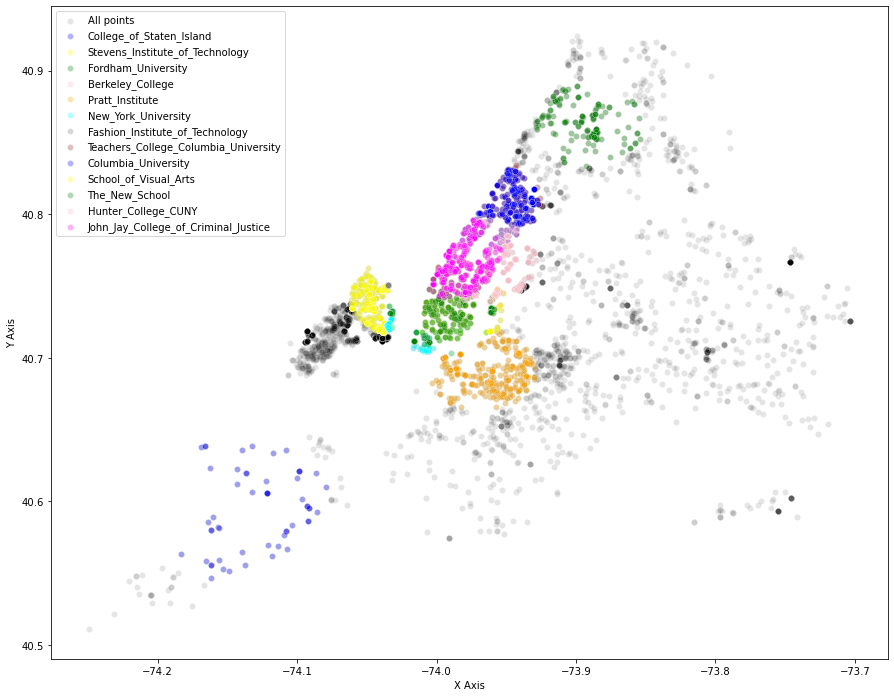

In [27]:
plt.figure(figsize = (15,12))
# create a scatter plot of both DataFrames using Seaborn
sns.scatterplot(x='longitude', y='latitude', data=df, color='black',alpha=0.1, label='All points')
sns.scatterplot(x='longitude', y='latitude', data=College_of_Staten_Island, color='blue', alpha=0.3, label='College_of_Staten_Island')
sns.scatterplot(x='longitude', y='latitude', data=Stevens_Institute_of_Technology, color='yellow',alpha=0.3,  label='Stevens_Institute_of_Technology')
sns.scatterplot(x='longitude', y='latitude', data=Fordham_University, color='green',alpha=0.3,  label='Fordham_University')
sns.scatterplot(x='longitude', y='latitude', data=Berkeley_College, color='pink',alpha=0.3,  label='Berkeley_College')
sns.scatterplot(x='longitude', y='latitude', data=Pratt_Institute, color='orange',alpha=0.3,  label='Pratt_Institute')
sns.scatterplot(x='longitude', y='latitude', data=New_York_University, color='cyan',alpha=0.3,  label='New_York_University')
sns.scatterplot(x='longitude', y='latitude', data=Fashion_Institute_of_Technology, color='grey',alpha=0.3,  label='Fashion_Institute_of_Technology')
sns.scatterplot(x='longitude', y='latitude', data=Teachers_College_Columbia_University, color='brown',alpha=0.3,  label='Teachers_College_Columbia_University')
sns.scatterplot(x='longitude', y='latitude', data=Columbia_University, color='blue',alpha=0.3,  label='Columbia_University')
sns.scatterplot(x='longitude', y='latitude', data=School_of_Visual_Arts, color='yellow',alpha=0.3,  label='School_of_Visual_Arts')
sns.scatterplot(x='longitude', y='latitude', data=The_New_School, color='green',alpha=0.3,  label='The_New_School')
sns.scatterplot(x='longitude', y='latitude', data=Hunter_College_CUNY, color='pink',alpha=0.3,  label='Hunter_College_CUNY')
sns.scatterplot(x='longitude', y='latitude', data=John_Jay_College_of_Criminal_Justice, color='magenta',alpha=0.3,  label='John_Jay_College_of_Criminal_Justice')


# add labels and legend
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()

# show the plot
plt.show()

## Visulaize the data in the map after the radius was applied

C:\Users\SaraM\anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


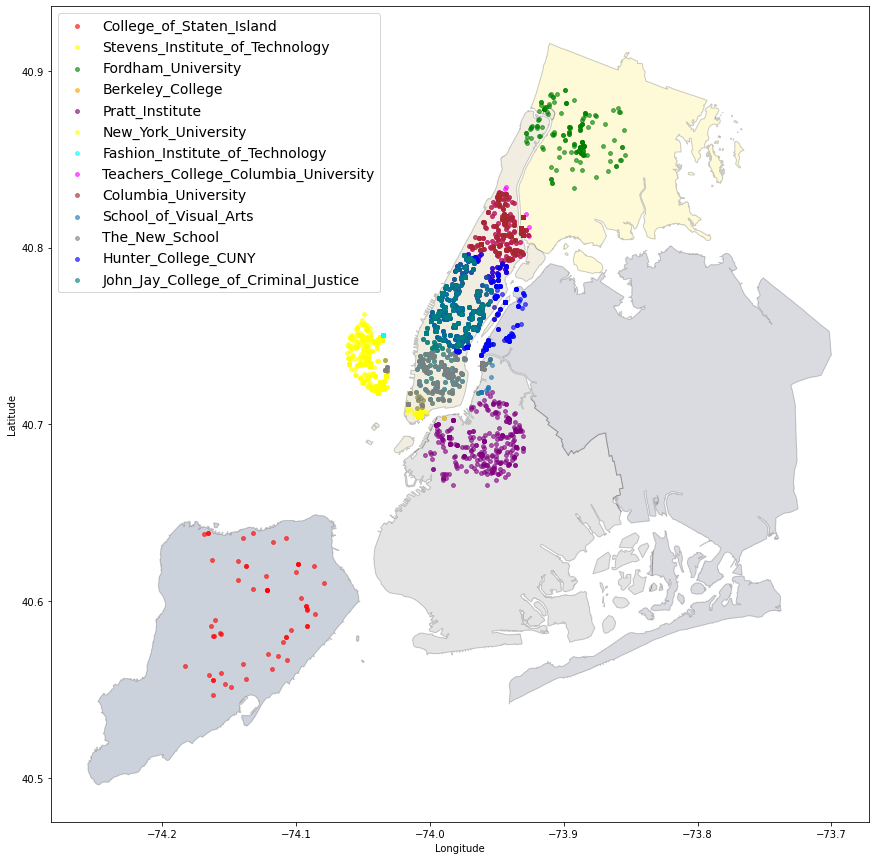

In [52]:
dfs = {
    'College_of_Staten_Island': College_of_Staten_Island,
    'Stevens_Institute_of_Technology': Stevens_Institute_of_Technology,
    'Fordham_University': Fordham_University,
    'Berkeley_College': Berkeley_College,
    'Pratt_Institute': Pratt_Institute,
    'New_York_University': New_York_University,
    'Fashion_Institute_of_Technology': Fashion_Institute_of_Technology,
    'Teachers_College_Columbia_University': Teachers_College_Columbia_University,
    'Columbia_University': Columbia_University,
    'School_of_Visual_Arts': School_of_Visual_Arts,
    'The_New_School': The_New_School,
    'Hunter_College_CUNY': Hunter_College_CUNY,
    'John_Jay_College_of_Criminal_Justice': John_Jay_College_of_Criminal_Justice
}

crs = {'init': 'epsg:4326'}
geometry = []
names = []
colors = ['red', 'yellow', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', '#1F77B4', 'gray', 'blue', 'teal']
color_map = {name: color for name, color in zip(dfs.keys(), colors)}

for name, df in dfs.items():
    for xy in zip(df["longitude"], df["latitude"]):
        geometry.append(Point(xy))
        names.append(name)

geodata = geopandas.GeoDataFrame({'name': names, 'geometry': geometry}, crs=crs)

fig, ax = plt.subplots(figsize=(15, 15))

boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))

boroughs.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=0.2,linewidth=1,cmap="cividis")

for name in geodata['name'].unique():
    geodata[geodata['name'] == name].plot(ax=ax, color=color_map[name], alpha=0.6, markersize=15, label=name)

plt.legend(loc='upper left', fontsize=14)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')
plt.show()


## Visualize the location of each university

In [28]:
data = {'College/University': ['College of Staten Island', 'Stevens Institute of Technology', 'Fordham University',
                               'Berkeley College', 'Pratt Institute', 'New York University',
                               'Fashion Institute of Technology', 'Teachers College, Columbia University',
                               'Hofstra University', 'Columbia University', 'School of Visual Arts',
                               'The New School', 'Hunter College, CUNY', 'John Jay College of Criminal Justice',
                               'Rutgers Newark'],
        'Latitude': [40.6021807, 40.74481, 40.8620403, 40.7539196, 40.6913843, 40.7295134, 40.7472624,
                     40.8101571, 40.7166872, 40.8075355, 40.7387621, 40.7356196, 40.7678398, 40.7707237,
                     40.74068705],
        'Longitude': [-74.1525698, -74.025244, -73.8901834, -73.9816906, -73.9674705, -73.9986496, -73.9972179,
                      -73.9626458, -73.5993965, -73.9647614, -73.9844433, -73.9958555, -73.9667178, -73.9914229,
                      -74.1748889761762]}

df_location_uni = pd.DataFrame(data)

<Figure size 1080x864 with 0 Axes>

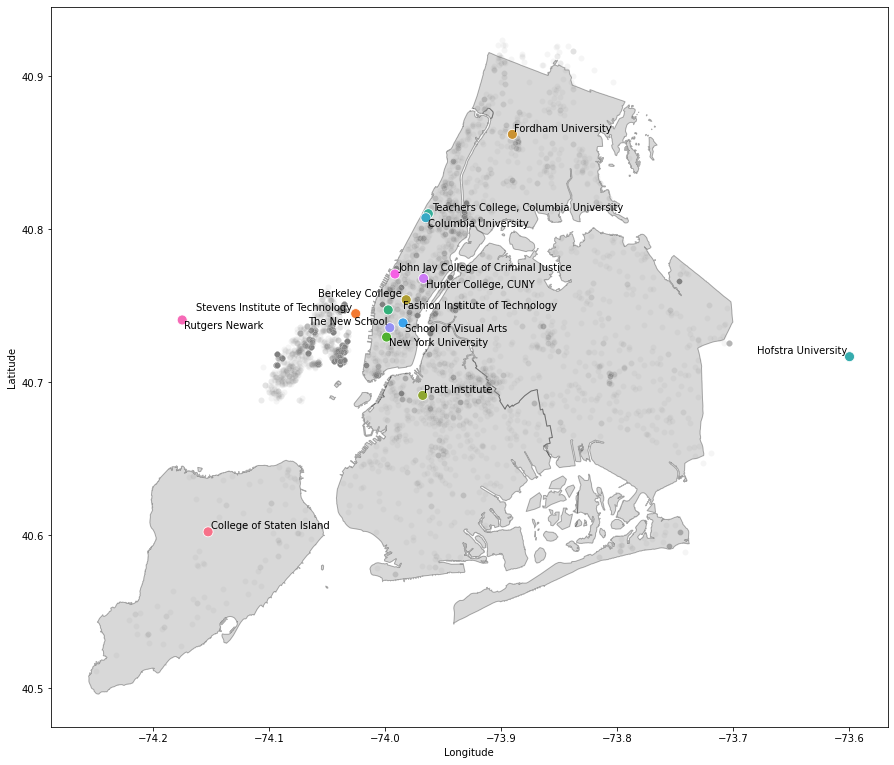

In [29]:
from adjustText import adjust_text

plt.figure(figsize=(15, 12))

crs = {'init': 'epsg:4326'}

fig, ax = plt.subplots(figsize=(15, 15))

boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))
boroughs.plot(ax=ax, facecolor='Grey', edgecolor='k', alpha=0.3, linewidth=1)

# plot all the points
sns.scatterplot(data=df, x='longitude', y='latitude', color='grey', alpha=0.08)

# plot the university points
sns.scatterplot(data=df_location_uni, x='Longitude', y='Latitude', color='red', hue='College/University',s=100)

# add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')


# add university names next to the points
texts = []
for index, row in df_location_uni.iterrows():
    texts.append(plt.text(row['Longitude'], row['Latitude'], row['College/University'], fontsize=10, color='black'))

# adjust the position of the text labels to avoid overlapping
adjust_text(texts)
plt.gca().legend().remove()
# show the plot
plt.show()




## The random forest models

In [30]:
dfs = {'College_of_Staten_Island': College_of_Staten_Island,
       'Stevens_Institute_of_Technology': Stevens_Institute_of_Technology,
       'Fordham_University': Fordham_University,
       'Berkeley_College': Berkeley_College,
       'Pratt_Institute': Pratt_Institute,
       'New_York_University': New_York_University,
       'Fashion_Institute_of_Technology': Fashion_Institute_of_Technology,
       'Teachers_College_Columbia_University': Teachers_College_Columbia_University,
       'Columbia_University': Columbia_University,
       'School_of_Visual_Arts': School_of_Visual_Arts,
       'The_New_School': The_New_School,
       'Hunter_College_CUNY':Hunter_College_CUNY,
       'John_Jay_College_of_Criminal_Justice':John_Jay_College_of_Criminal_Justice}  

In [31]:
dfs.keys()

dict_keys(['College_of_Staten_Island', 'Stevens_Institute_of_Technology', 'Fordham_University', 'Berkeley_College', 'Pratt_Institute', 'New_York_University', 'Fashion_Institute_of_Technology', 'Teachers_College_Columbia_University', 'Columbia_University', 'School_of_Visual_Arts', 'The_New_School', 'Hunter_College_CUNY', 'John_Jay_College_of_Criminal_Justice'])

In [32]:
forest_sizes = np.array([1,2,5,10,20,30,50,60,70,80,90,100])
train_R2 = np.zeros(len(forest_sizes))
test_R2 = np.zeros(len(forest_sizes))

for name, df in dfs.items():
    #drop amenities 
    amenities_to_drop=[]
    for a in amenities:
        if df[a].sum() <= 0.30*len(df):
            amenities_to_drop.append(a)  
    df = df.drop(columns=amenities_to_drop)
    df = df.drop(columns=['longitude','latitude'])
    X = df.loc[:, df.columns != 'student_check']
    y = df['student_check']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    print()
    print('\033[35m' + 'For University '+ name+ '\033[0m')
    for i in range(len(forest_sizes)):
        size = forest_sizes[i]
        rf = RandomForestClassifier(n_estimators=size)
        rf.fit(X_train, np.ravel(y_train))
        r1 = rf.score(X_train, y_train)
        r2 = rf.score(X_test, y_test)
        train_R2[i] = r1
        test_R2[i] = r2

    # Find the number of trees associated with the lowest test_R2
    best_size_idx = np.argmax(test_R2)
    best_size = forest_sizes[best_size_idx]
    print('Best number of trees: ', best_size)

    # Refit the model with the best number of trees on the entire training set
    best_rf = RandomForestClassifier(n_estimators=best_size)
    best_rf.fit(X_train, np.ravel(y_train))
    r1 = best_rf.score(X_train, y_train)
    r2 = best_rf.score(X_test, y_test)
    print('R² of Random Forest Classifier on training set: {:.3f}'.format(r1))
    print('R² of Random Forest Classifier on test set: {:.3f}'.format(r2))
    y_pred = best_rf.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))
    
    
    importances = rf.feature_importances_
    # Sort the feature importance in descending order
    sorted_indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    for f in range(X_train.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30,
                                feat_labels[sorted_indices[f]],
                                importances[sorted_indices[f]]))



For University College_of_Staten_Island
Best number of trees:  30
R² of Random Forest Classifier on training set: 0.973
R² of Random Forest Classifier on test set: 1.000
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        19

    accuracy                          1.000        19
   macro avg      1.000     1.000     1.000        19
weighted avg      1.000     1.000     1.000        19

 1) neighborhood_code              0.315439
 2) walkScore                      0.174765
 3) price                          0.150401
 4) area                           0.147142
 5) transitScore                   0.125548
 6) bathtype                       0.041815
 7) roomtype                       0.029825
 8) Hardwood Floors                0.014738
 9) isVerified                     0.000327
10) ifPrivate                      0.000000

For University Stevens_Institute_of_Technology
Best number of trees:  10
R² of Random Forest Classifier on training

Best number of trees:  1
R² of Random Forest Classifier on training set: 0.998
R² of Random Forest Classifier on test set: 0.987
              precision    recall  f1-score   support

           0      0.786     1.000     0.880        11
           1      1.000     0.986     0.993       213

    accuracy                          0.987       224
   macro avg      0.893     0.993     0.936       224
weighted avg      0.989     0.987     0.987       224

 1) transitScore                   0.377027
 2) walkScore                      0.123253
 3) price                          0.088390
 4) neighborhood_code              0.073113
 5) area                           0.054561
 6) Elevator                       0.042447
 7) Lounge                         0.027799
 8) High Speed Internet Access     0.027315
 9) In Unit Washer & Dryer         0.024278
10) Laundry Facilities             0.021163
11) Doorman                        0.020634
12) bathtype                       0.016485
13) Package Serv

Best number of trees:  5
R² of Random Forest Classifier on training set: 1.000
R² of Random Forest Classifier on test set: 0.977
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         3
           1      0.983     0.994     0.989       174

    accuracy                          0.977       177
   macro avg      0.491     0.497     0.494       177
weighted avg      0.966     0.977     0.972       177

 1) price                          0.132276
 2) Maintenance on site            0.116841
 3) isVerified                     0.105807
 4) neighborhood_code              0.075708
 5) area                           0.074340
 6) Laundry Facilities             0.064672
 7) Elevator                       0.060995
 8) walkScore                      0.057297
 9) Microwave                      0.048035
10) Furnished                      0.045979
11) Dishwasher                     0.038324
12) Fitness Center                 0.031923
13) roomtype    

In [33]:
Pratt_Institute

,area,roomtype,bathtype,latitude,longitude,walkScore,transitScore,isVerified,24 Hour Availability,Air Conditioning,...,Wi-Fi,Wi-Fi at Pool and Clubhouse,Window Coverings,Workshop,Yard,Zen Garden,student_check,ifPrivate,price,neighborhood_code
0,1000.0,3.0,1.0,40.67680,-73.95707,88.0,100.0,False,0,1,...,0,0,0,0,0,0,1,0,3800.0,0
10,122.0,0.0,1.0,40.67733,-73.94115,91.0,100.0,True,0,1,...,0,0,0,0,0,0,1,0,1402.0,0
11,97.0,0.0,1.0,40.67733,-73.94115,91.0,100.0,True,0,1,...,0,0,0,0,0,0,1,0,1607.0,0
12,122.0,0.0,1.0,40.67733,-73.94115,91.0,100.0,True,0,1,...,0,0,0,0,0,0,1,0,1682.0,0
20,800.0,3.0,1.0,40.69641,-73.93538,98.0,98.0,True,0,1,...,0,0,0,0,0,0,0,0,2727.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6766,840.0,2.0,1.0,40.68442,-73.94216,95.0,100.0,False,0,0,...,0,0,0,0,0,0,1,0,3299.0,89
6767,840.0,2.0,1.0,40.70364,-73.94158,98.0,100.0,False,0,1,...,0,0,0,0,0,0,1,0,3667.0,2
6770,500.0,1.0,1.0,40.71786,-73.96420,99.0,98.0,False,0,1,...,0,0,0,0,0,0,1,0,6130.0,2
6787,1000.0,3.0,1.0,40.71387,-73.98551,99.0,100.0,False,0,1,...,0,0,0,0,0,0,1,0,3895.0,199
